In [6]:
from util import create_distance_matrix
import matplotlib.pyplot as plt
from homology import rips, transform_to_birth_persistence, filtered_complexes_to_tuples
import json
import numpy as np
import graph as g
import networkx as nx

In [5]:
def load_data():
    f = open("countries.geo.json")
    return json.load(f)

def process_geometry(data):
    # Itterate over all countries
    graph = g.Graph(0, dimensions=2)
    country_dict = {}

    print("Getting polygon points")
    for f in data['features']:
        geometry = f['geometry']
        points = geometry['coordinates']
        if geometry['type'] == 'MultiPolygon':
            array = points[0]
            for i in range(1, len(points)):
                array[0] += points[i][0]
            points = np.array(array)
        elif f['properties']['name'] == "South Africa":  # South Africa has a hole in its country, making it a bit odd to handle
            array = points[0]
            for i in range(1, len(points)):
                array += points[i]
            points = np.array([array])
        else:
            points = np.array(points)
        points = np.squeeze(points)

        country_dict[f['id']] = graph.add_node(np.average(points, axis=0)), points

    print("Connecting nodes")
    connect_countries(country_dict)
    print("Done")
    return graph


def connect_countries(country_dict):
    keys = list(country_dict.keys())
    for i in range(len(keys)):
        for j in range(i + 1, len(keys)):
            intersecting_points = [x for x in set(tuple(x) for x in country_dict[keys[i]][1]) & set(tuple(x) for x in country_dict[keys[j]][1])]
            if len(intersecting_points) > 1:
                country_dict[keys[i]][0].connect(country_dict[keys[j]][0])


data = load_data()
graph = process_geometry(data)

Getting polygon points
Connecting nodes
Done


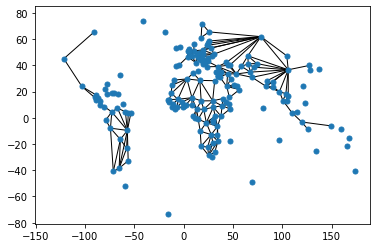

In [12]:
def display_graph(g):
    nx_graph = to_nx_graph(g)

    fig, ax = plt.subplots()
    nx.draw(nx_graph, nx.get_node_attributes(nx_graph,'pos'), node_size=25)
    limits=plt.axis('on')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    plt.show()
    plt.close(fig)

def to_nx_graph(graph):
    export = nx.Graph()
    added_nodes = []
    for node in graph.nodes.flatten():
        export.add_node(node, pos=node.coordinates)
        added_nodes.append(node)
    for edge in graph.get_edges():
        export.add_edge(added_nodes[edge[0]], added_nodes[edge[1]])
    return export


display_graph(graph)

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.  31.5 31.5 31.5 31.6 31.6 31.6
 31.7 31.7 31.7 31.7 31.8 31.8 31.8 31.8 31.8 31.8 31.9 31.9 31.9 31.9
 31.9 31.9 31.9 32.  32.  32.  32.  32.  32.  32.  32.  32.  32.1 32.1
 32.1 32.1 32.1 32.1 32.1 32.1 32.1 32.1 32.1 32.1 32.1 32.1 32.1 32.1
 32.2 32.2 32.2 32.2 32.2 32.2 32.2 32.2 32.2 32.2 32.2 32.2 32.3 32.3
 32.3 32.3 32.3 32.3 32.3 32.3 32.3 32.3 32.3 32.3 32.3 32.3 32.3 32.3
 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4
 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.4 32.5 32.5 32.5 32.5 32.5
 32.5 32.5 32.5 32.5 32.5 32.5 32.5 32.5 32.5 32.5 32.5 32.5 32.5 32.5
 32.5 32.6 32.6 32.6 32.6 32.6 32.6 32.6 32.6 32.6 32.6 32.6 32.6 32.6
 32.6 32.6 32.6 32.6 32.6 32.6 32.6 32.7 32.7 32.7 32.7 32.7 32.7 32.7
 32.7 32.7 32.7 32.7 32.7 32.7 32.7 32.7 32.7 32.8 32.8 32.8 32.8 32.8
 32.8 32.8 32.8 32.8 32.8 32.8 32.8 32.8 32.8 32.8 32.8 32.8 32.9 32.9
 32.9 3

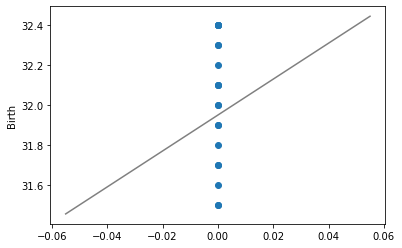

In [73]:
def create_plots(data):
    for x in data:
        tuples = filtered_complexes_to_tuples(np.array(x[1][0]), np.array(x[1][1]))
        tuples[tuples == -np.inf] = 200

        plt.scatter(tuples.T[0], tuples.T[1])
        # plt.plot(plt.xlim(), plt.ylim(), c="grey")  # This doesn't work. Need a y = x plot
        plt.ylabel("Death")
        plt.ylabel("Birth")
        break

create_plots(processed)